<a href="https://colab.research.google.com/github/amirsartipi13/DM-Final-Project/blob/master/Final_Q1_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip installs

In [ ]:
!pip install pandas_read_xml

     |████████████████████████████████| 138 kB 7.6 MB/s 
     |████████████████████████████████| 338 kB 51.5 MB/s 
     |████████████████████████████████| 62 kB 679 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 9.2 MB/s 
     |████████████████████████████████| 636 kB 54.3 MB/s 
     |████████████████████████████████| 895 kB 66.0 MB/s 
     |████████████████████████████████| 3.3 MB 41.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install -q -U tensorflow-text

     |████████████████████████████████| 4.3 MB 7.8 MB/s 


In [ ]:
pip install -q tf-models-official

     |████████████████████████████████| 1.6 MB 7.3 MB/s 
     |████████████████████████████████| 99 kB 9.2 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 1.2 MB 47.9 MB/s 
     |████████████████████████████████| 37.1 MB 49 kB/s 
     |████████████████████████████████| 352 kB 46.7 MB/s 
     |████████████████████████████████| 211 kB 71.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 679 kB 34.3 MB/s 


In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 503 kB 39.1 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.8 MB 34.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=698005ac0fd000f6f6931a4c27578a53b612e8ec236fcde7cea43404efd85326
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

# imports part


In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import xml.etree.ElementTree as et 

import pickle


# tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
# from official.nlp import optimization  

import matplotlib.pyplot as plt

# transformers
from transformers import BertTokenizer, TFBertModel, BertConfig, AutoTokenizer,\
 TFBertForSequenceClassification, AutoModelForSequenceClassification, AdamW

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, GlobalMaxPool1D, SpatialDropout1D

from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


# pre-defined functions


In [ ]:
def save_obj(obj, name, dir='./'):
    with open(dir + '/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name, dir='./'):
    with open(dir + '/'+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

def f(x):
    return {
        'positive': 0,
        'neutral': 2,
        'negative': 1,
    }[x]

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    return plt
    
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

# Convert data to pandas dataframe

In [ ]:
df_path = '/content/drive/MyDrive/data_sets/DM-Final/Pars-ABSA_xml.xml'
def convert_to_pandas(path):
  xtree = et.parse(path)
  xroot = xtree.getroot()
  # df_cols = [ "text", "term", "polarity", "from", "to"]
  df_cols = [ "text", "term", "polarity", "text_aspect"]

  rows = []
  for node in xroot: 
      # id = node.attrib.get('id') if node is not None else None
      text = node.find('text').text if node is not None else None
      aspect_terms = node.find('aspectTerms')
      for aspect_term in aspect_terms:
        term = aspect_term.get('term') if node is not None else None
        polarity = f(aspect_term.get('polarity')) if node is not None else None
        # polarity = aspect_term.get('polarity') if node is not None else None

        # frm = int(aspect_term.get('from')) if node is not None else None
        # to = int(aspect_term.get('to')) if node is not None else None
        # rows.append({"id":id, "text":text, "term":term,
        #             "polarity":polarity, "from":frm, "to":to})
        rows.append({"text":text, "term":term, "text_aspect": text + ' <POS> ' + term,
                    "polarity":polarity})
  return pd.DataFrame(rows, columns = df_cols)
  

In [ ]:
df = convert_to_pandas(df_path)
df

,text,term,polarity,text_aspect
0,﻿من این تلفن را چند هفته گذشته خریدم متاسفانه ...,کیفیت ساخت,2,﻿من این تلفن را چند هفته گذشته خریدم متاسفانه ...
1,کارت پرسرعت و با کیفیتی هست سرعت نوشتن به طور ...,کارت,0,کارت پرسرعت و با کیفیتی هست سرعت نوشتن به طور ...
2,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...,سامسونگ,1,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...
3,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...,فلشش,2,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...
4,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...,لنز دوربین,1,سلام تقریبا دو هفته میشه که این گوشی از دیجی ک...
...,...,...,...,...
9997,پولی که به این میخواین بدین رو میسه گلکسی C۵خر...,این,1,پولی که به این میخواین بدین رو میسه گلکسی C۵خر...
9998,پولی که به این میخواین بدین رو میسه گلکسی C۵خر...,گلکسی C۵,0,پولی که به این میخواین بدین رو میسه گلکسی C۵خر...
9999,دوستان عزیز دیجی کالایی سلام. اقا من این پرینت...,این پرینترو,0,دوستان عزیز دیجی کالایی سلام. اقا من این پرینت...
10000,دوستان عزیز دیجی کالایی سلام. اقا من این پرینت...,قیمت,0,دوستان عزیز دیجی کالایی سلام. اقا من این پرینت...


# Load word2vec word embedding

In [ ]:
!sed '100q;d' /content/drive/MyDrive/data_sets/DM-Final/word2vec/model.txt + '   '

نمی 0.169135 0.085174 0.144672 -0.739465 0.067215 0.148584 -0.072232 0.203143 -0.373543 0.861530 0.153962 0.063675 -0.466113 0.395741 -0.013993 0.124323 0.101419 -0.114091 0.284058 0.152010 -0.149613 -0.340335 0.006714 -0.303393 -0.127120 -0.342948 0.185054 -0.601197 0.184517 0.142762 0.561439 0.169455 0.149604 0.341140 -0.195826 0.008339 0.654575 -0.235035 0.238856 -0.439835 0.227472 0.566207 0.001228 -0.430045 0.382524 -0.028190 -0.129100 -0.399089 -0.026422 -0.553727 -0.263727 0.081743 -0.021855 0.038727 -0.300098 0.182668 0.067251 -0.367887 -0.103157 -0.337600 0.536474 -0.221353 -0.001241 -0.417480 -0.026372 0.220756 0.033398 0.014890 0.546118 0.249178 0.292674 0.116594 0.115529 0.159619 -0.341741 -0.027165 -0.355822 0.613608 -0.087582 0.248401 -0.083046 0.231372 -0.010196 0.092492 0.028889 0.446701 -0.080706 -0.068594 0.787758 -0.017440 -0.092307 -0.039878 0.001501 -0.157051 0.272229 0.258019 0.268746 0.026748 0.007193 -0.333841 


In [ ]:
path = "/content/drive/MyDrive/data_sets/DM-Final/word2vec/model.txt"
def load_word_embedding(path, errors='replace'):
  embedding = dict()
  files= open(path,errors=errors, mode='r')
  lines = files.readlines()[1:]
  files.close()
  for line in lines:
    values = line.split()
    embedding[values[0]] = np.array(values[1:], dtype='float32')
  return embedding

In [ ]:
embedding = load_word_embedding(path)
save_obj(embedding, 'embedding',"/content/drive/MyDrive/data_sets/DM-Final/obj")

In [ ]:
embedding = load_obj('embedding',"/content/drive/MyDrive/data_sets/DM-Final/obj")
embedding

# Creating embedding matrix

In [ ]:
# def create_embedding_matrix(embedding, tokenizer, embedding_dim):
#   word_index = tokenizer.word_index
#   vocab_size = len(word_index) + 1
#   embedding_matrix = np.zeros((vocab_size, embedding_dim))

  
#   for word in word_index:
#     if word in embedding:
#       idx = word_index[word]
#       embedding_matrix[idx]= embedding[word]
#   return embedding_matrix
filepath = '/content/drive/MyDrive/data_sets/DM-Final/word2vec/model.txt'
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    files= open(filepath,errors='replace', mode='r')
    lines = files.readlines()[1:]
    files.close()
    for line in lines:
        word, *vector = line.split()
        if word in word_index:
            idx = word_index[word] 
            embedding_matrix[idx] = np.array(
                vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

# crate embedding matrix ELMO


In [ ]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)


INFO:absl:Using /tmp/tfhub_modules to cache modules.


In [ ]:
df.count()[0]

10002

In [ ]:
df_small = df.iloc[:round((df.count()[0])* 0.2),:]

In [ ]:
# just a random sentence
x = ["بهترین جمللات تاریخی از مبدا اسلام تا به اینجا"]

# Extract ELMo features 
embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(1), Dimension(9), Dimension(1024)])

In [ ]:
embeddings = elmo(df_small['text'].values.tolist(), signature="default", as_dict=True)["elmo"]
embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(2000), Dimension(1086), Dimension(1024)])

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
list_train = [df_small[i:i+100] for i in range(0,df_small.shape[0],100)]
# list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

In [ ]:
# Extract ELMo embeddings
elmo_train = [elmo_vectors(x['text']) for x in list_train]
# elmo_test = [elmo_vectors(x['clean_tweet']) for x in list_test]

In [ ]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

# Fasttext embedding

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 8.0 MB/s 
  Using cached pybind11-2.7.0-py2.py3-none-any.whl (199 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3090496 sha256=ac67c58b9c5444cc1890eebb90de07e18fb201bafd70371826e25ca9264748bd
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext.util
fasttext.util.download_model('fa', if_exists='ignore')  # English
ft = fasttext.load_model('cc.fa.300.bin')

ConnectionResetError: ignored

# Tokenize Train Test Pading


In [ ]:
def tokenize_train_test_padd(df,num_words=20000 ,test_size=0.2, max_len=250):
  df = df.sample(frac=1, random_state=0)

  features = ['text_aspect']
  # labels = ['polarity']
  labels = pd.get_dummies(df['polarity']).values
  # labels = df.iloc[ : , [2,]].values
  # encoder = OneHotEncoder(sparse=False)
  # labels = encoder.fit_transform(labels)

  # feature selection
  # texts = df['text_aspect']
  # y = df['polarity']
  
  # le = LabelEncoder()
  # y = le.fit_transform(y)





  # test train split
  X_train, X_test, y_train, y_test = train_test_split(df[features], labels,
                                                            test_size=test_size,
                                                            random_state=42)
  X_train = [text for text in X_train.text_aspect]
  y_train = [label for label in y_train.tolist()]
  # y_train = [label for label in y_train.polarity]

  X_test = [text for text in X_test.text_aspect]
  y_test = [label for label in y_test.tolist()]
  # y_test = [label for label in y_test.polarity]

  # print(X_train)
  
  # tokenize words
  tokenizer = Tokenizer(num_words=num_words)
  tokenizer.fit_on_texts(X_train)

  train_sequences = tokenizer.texts_to_sequences(X_train)
  train_sequences_matrix = pad_sequences(train_sequences,padding='post', maxlen=max_len)


  test_sequences = tokenizer.texts_to_sequences(X_test)
  test_sequences_matrix = pad_sequences(test_sequences,padding='post', maxlen=max_len)


  vocab_size = len(tokenizer.word_index) + 1



  return train_sequences, train_sequences_matrix, test_sequences,test_sequences_matrix, y_train, y_test, vocab_size, tokenizer, df


# Test place

In [ ]:
df = convert_to_pandas(df_path)
# global configs

epochs = 10
batch_size = 128

n_dim = 100
n_unique_words = 17943
max_text_length = 300
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_dense = 256
dropout = 0.3

n_conv = 256
k_conv = 3

In [ ]:
len(tokenizer.word_index)

In [ ]:
# embedding = load_obj('embedding',"/content/drive/MyDrive/data_sets/DM-Final/obj")


In [ ]:
train_sequences, train_sequences_matrix, test_sequences,test_sequences_matrix, y_train, y_test, vocab_size, tokenizer, df = tokenize_train_test_padd(df,
                                                                                                                                                     num_words=n_unique_words,
                                                                                                                                                     max_len=max_text_length)


In [ ]:
# train_sequences[:3], train_sequences_matrix[:3],y_train[:3]
vocab_size, np.array(train_sequences).shape, y_train

In [ ]:
embedding_matrix = create_embedding_matrix(filepath, tokenizer.word_index, n_dim)

In [ ]:
embedding_matrix[:-3], embedding_matrix.shape, len(y_train), len(tokenizer.word_index)

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.066794  ,  0.079162  ,  0.167612  , ...,  0.064806  ,
         -0.007532  , -0.150943  ],
        [-0.005494  ,  0.017037  ,  0.08383   , ...,  0.011669  ,
         -0.27717799,  0.009339  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.249164  , -0.043723  ,  1.01856506, ...,  0.115863  ,
         -0.51858002, -0.16198701],
        [ 0.630068  ,  0.070424  ,  0.476942  , ..., -0.30098701,
         -0.875063  , -0.61555803]]), (17943, 100), 8001, 17942)

In [ ]:
# tokenizer = Tokenizer(num_words=5000)
tokenizer.texts_to_sequences(['سلام من امیر سرتیپی هستم'])
# tokenizer.fit_on_texts(['hello this is amir', 'what the fuck!'])
# tokenizer.texts_to_sequences(['hello this is amir', 'what the fuck!'])

[[59, 12, 10634, 199]]

# CNN model training


In [ ]:
def CNN():
    model = Sequential()
    model.add(layers.Embedding(n_unique_words,n_dim,weights=[embedding_matrix], input_length=n_unique_words))
    model.add(layers.SpatialDropout1D(drop_embed))
    model.add(layers.Conv1D(n_conv, k_conv , activation='relu'))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(n_dense, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(3, activation='softmax'))
    return model

In [ ]:
model_cnn = CNN()
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17943, 100)        1794300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 17943, 100)        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 17941, 256)        77056     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [ ]:
# np.array(train_sequences_matrix).shape, len(np.array(y_train))
np.array(test_sequences_matrix).shape, len(np.array(y_test))


((2001, 300), 2001)

In [ ]:
history_cnn = model_cnn.fit(np.array(train_sequences_matrix), np.array(y_train),
                    epochs=epochs,
                    verbose=True,
                    validation_data=(np.array(test_sequences_matrix), np.array(y_test)),
                    batch_size=batch_size)

loss, accuracy = model_cnn.evaluate(np.array(train_sequences_matrix), np.array(y_train), verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_cnn.evaluate(np.array(test_sequences_matrix), np.array(y_test), verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
63/63 [==============================] - 43s 439ms/step - loss: 1.0619 - accuracy: 0.4768 - val_loss: 0.8302 - val_accuracy: 0.6422
Epoch 2/10
63/63 [==============================] - 27s 425ms/step - loss: 0.7763 - accuracy: 0.6605 - val_loss: 0.6874 - val_accuracy: 0.7136
Epoch 3/10
63/63 [==============================] - 27s 426ms/step - loss: 0.6535 - accuracy: 0.7270 - val_loss: 0.6328 - val_accuracy: 0.7486
Epoch 4/10
63/63 [==============================] - 27s 425ms/step - loss: 0.5744 - accuracy: 0.7644 - val_loss: 0.6214 - val_accuracy: 0.7526
Epoch 5/10
63/63 [==============================] - 29s 454ms/step - loss: 0.4989 - accuracy: 0.8046 - val_loss: 0.6118 - val_accuracy: 0.7621
Epoch 6/10
63/63 [==============================] - 27s 428ms/step - loss: 0.4496 - accuracy: 0.8226 - val_loss: 0.6238 - val_accuracy: 0.7616
Epoch 7/10
63/63 [==============================] - 27s 427ms/step - loss: 0.3903 - accuracy: 0.8509 - val_loss: 0.6405 - val_accuracy: 0.7701

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

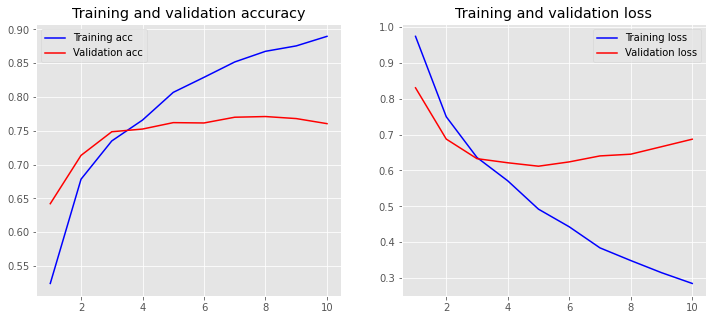

In [ ]:
plot_history(history_cnn)

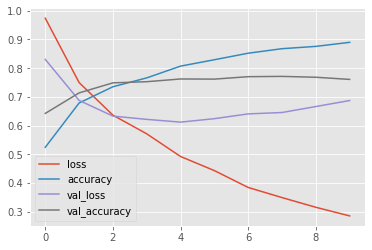

In [ ]:
  pd.DataFrame(history_cnn.history).plot()

# LSTM with Word2Vec

In [ ]:
# epochs = 4
# batch_size = 128

# n_dim = 64
# n_unique_words = 5000
# max_text_length = 500
# pad_type = trunc_type = 'pre'


drop_embed = 0.2
n_lstm = 256
n_dim = 100
drop_lstm = 0
pad_type = trunc_type = 'pre'
epochs = 4
batch_size = 32



In [ ]:
def LSTM_NN():
    model = Sequential()
    model.add(layers.Embedding(n_unique_words, n_dim, weights=[embedding_matrix], input_length=max_text_length))
    model.add(layers.SpatialDropout1D(drop_embed))
    model.add(layers.LSTM(n_lstm, dropout=drop_lstm))
    model.add(layers.Dense(3, activation='softmax'))
    return model

In [ ]:
model_lstm = LSTM_NN()
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
model_lstm.compile(optimizer=opt,loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_lstm.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 100)          1794300   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 300, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)               365568    
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 771       
Total params: 2,160,639
Trainable params: 2,160,639
Non-trainable params: 0
_________________________________________________________________


In [ ]:

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
# checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

history_lstm = model_lstm.fit(np.array(train_sequences_matrix), np.array(y_train),
                              epochs=10,
                              batch_size=batch_size,
                              validation_data=(np.array(test_sequences_matrix), np.array(y_test)))

loss, accuracy = model_lstm.evaluate(np.array(train_sequences_matrix), np.array(y_train), verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_lstm.evaluate(np.array(test_sequences_matrix), np.array(y_test), verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
251/251 [==============================] - 319s 1s/step - loss: 1.0384 - accuracy: 0.5135 - val_loss: 1.0099 - val_accuracy: 0.5197
Epoch 2/10
251/251 [==============================] - 284s 1s/step - loss: 1.0160 - accuracy: 0.5173 - val_loss: 1.0039 - val_accuracy: 0.5212
Epoch 3/10
251/251 [==============================] - 284s 1s/step - loss: 1.0264 - accuracy: 0.5042 - val_loss: 1.0148 - val_accuracy: 0.5172
Epoch 4/10
251/251 [==============================] - 284s 1s/step - loss: 1.0290 - accuracy: 0.5081 - val_loss: 1.0228 - val_accuracy: 0.5182
Epoch 5/10
251/251 [==============================] - 283s 1s/step - loss: 1.0256 - accuracy: 0.5096 - val_loss: 1.0038 - val_accuracy: 0.5187
Epoch 6/10
251/251 [==============================] - 284s 1s/step - loss: 1.0179 - accuracy: 0.5090 - val_loss: 1.0136 - val_accuracy: 0.5182
Epoch 7/10
251/251 [==============================] - 282s 1s/step - loss: 1.0176 - accuracy: 0.5111 - val_loss: 1.0063 - val_accuracy: 0.5187

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

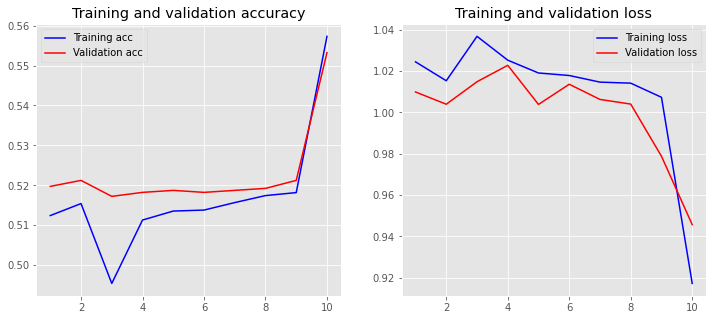

In [ ]:
plot_history(history_lstm)

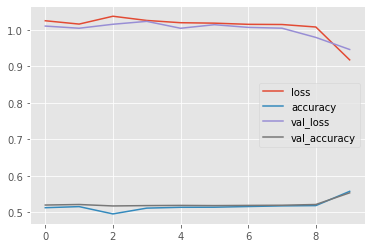

In [ ]:
  pd.DataFrame(history_lstm.history).plot()

# LSTM with random embedding matrix

In [ ]:
embedding_matrix_random[:3]

array([[0.60292346, 0.23602415, 0.01640262, 0.27225075, 0.86474867,
        0.68034077, 0.91750101, 0.47129326, 0.98026888, 0.14113634,
        0.69861821, 0.27613055, 0.69048716, 0.63108471, 0.89483622,
        0.12120189, 0.95938549, 0.29526111, 0.95066083, 0.75263571,
        0.21770366, 0.55464334, 0.34101916, 0.83564151, 0.62824427,
        0.25960336, 0.74301911, 0.36687557, 0.03936613, 0.12182087,
        0.34897379, 0.75724536, 0.91943256, 0.9094842 , 0.84048281,
        0.76033816, 0.63022532, 0.01163562, 0.91028947, 0.02789959,
        0.86827546, 0.32756378, 0.90636501, 0.06512261, 0.03865864,
        0.48550303, 0.70743945, 0.962375  , 0.0967593 , 0.57024782,
        0.14442502, 0.39300211, 0.17363586, 0.63749254, 0.90065122,
        0.45975608, 0.05070435, 0.58308811, 0.0818058 , 0.97574139,
        0.49861097, 0.41622607, 0.29033442, 0.67466544, 0.35760628,
        0.18900449, 0.15435766, 0.92931077, 0.56062991, 0.65459584,
        0.98026459, 0.06270061, 0.17007738, 0.59

In [ ]:
embedding_matrix_random = np.random.sample(embedding_matrix.shape)
# hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]


In [ ]:
def LSTM_RNN():
    model = Sequential()
    model.add(layers.Embedding(n_unique_words, n_dim, weights=[embedding_matrix_random], input_length=max_text_length))
    model.add(layers.SpatialDropout1D(drop_embed))
    model.add(layers.LSTM(n_lstm, dropout=drop_lstm))
    model.add(layers.Dense(3, activation='softmax'))
    return model

opt = tf.keras.optimizers.Adam(
    learning_rate=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
model_lstm_re = LSTM_RNN()
model_lstm_re.compile(optimizer=opt ,loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_lstm_re.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 100)          1794300   
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 300, 100)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               365568    
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 771       
Total params: 2,160,639
Trainable params: 2,160,639
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lr_scheduler_er = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
# checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

history_lstm_er = model_lstm_re.fit(np.array(train_sequences_matrix), np.array(y_train),
                              epochs=10,
                              validation_data=(np.array(test_sequences_matrix), np.array(y_test)),
                              callbacks=[lr_scheduler_er])


loss, accuracy = model_lstm_re.evaluate(np.array(train_sequences_matrix), np.array(y_train), verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_lstm_re.evaluate(np.array(test_sequences_matrix), np.array(y_test), verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
251/251 [==============================] - 291s 1s/step - loss: 1.0280 - accuracy: 0.5065 - val_loss: 1.0046 - val_accuracy: 0.5177
Epoch 2/10
251/251 [==============================] - 286s 1s/step - loss: 1.0279 - accuracy: 0.4973 - val_loss: 1.0149 - val_accuracy: 0.5172
Epoch 3/10
251/251 [==============================] - 284s 1s/step - loss: 1.0237 - accuracy: 0.5104 - val_loss: 1.0094 - val_accuracy: 0.5167
Epoch 4/10
251/251 [==============================] - 284s 1s/step - loss: 1.0147 - accuracy: 0.5192 - val_loss: 1.0052 - val_accuracy: 0.5182
Epoch 5/10
251/251 [==============================] - 283s 1s/step - loss: 1.0252 - accuracy: 0.5014 - val_loss: 1.0120 - val_accuracy: 0.5182
Epoch 6/10
251/251 [==============================] - 284s 1s/step - loss: 1.0183 - accuracy: 0.5132 - val_loss: 1.0217 - val_accuracy: 0.5172
Epoch 7/10
251/251 [==============================] - 284s 1s/step - loss: 1.0232 - accuracy: 0.5081 - val_loss: 1.0108 - val_accuracy: 0.5182

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

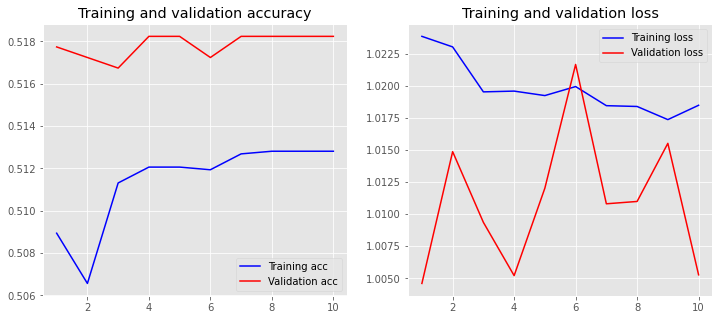

In [ ]:
plot_history(history_lstm_er)

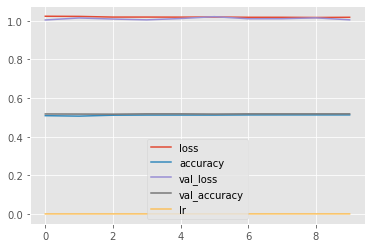

In [ ]:
  pd.DataFrame(history_lstm_er.history).plot()